#  Univariate visualizations


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

%matplotlib inline

pokemon=pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## Figures, Axes, and Subplots
he base of visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:    
`plt.hist(data=pokemon, x='speed');`    
Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.




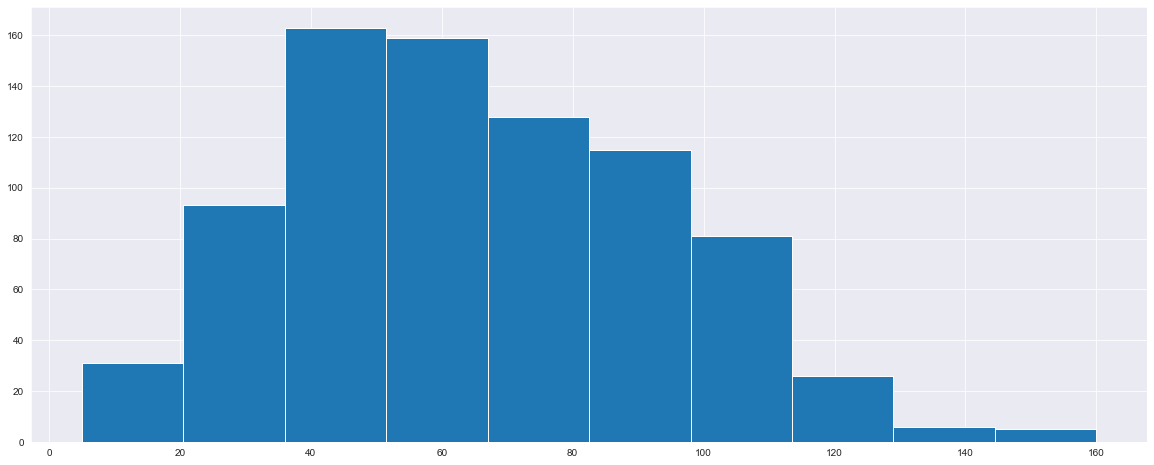

In [77]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');


## Demonstrate pyplot.sca() and pyplot.text() to generate a grid of subplots

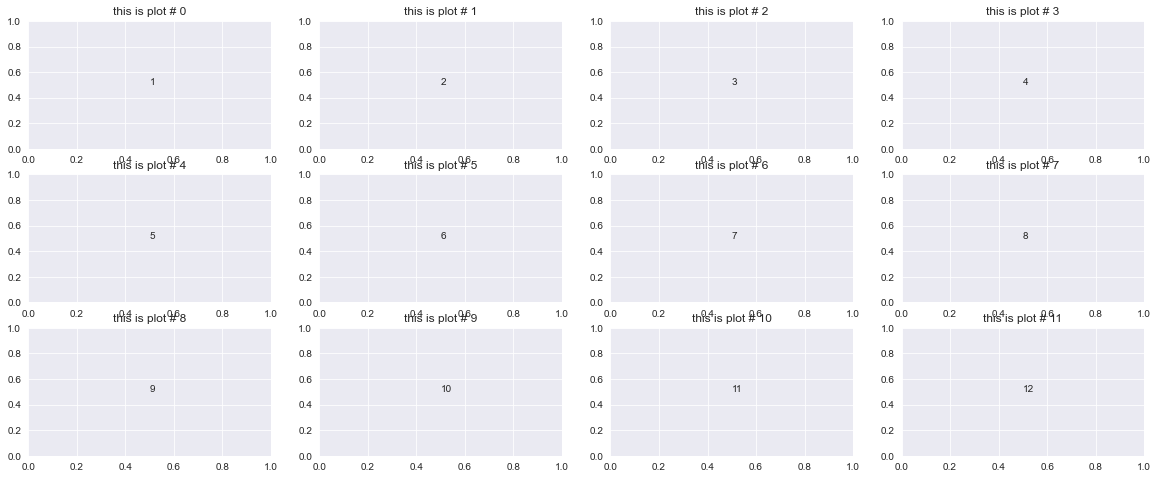

In [78]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes
    plt.title(f'this is plot # {i}')

## 1-Bar plots (Used for categorical)

## Univariate Categorical Visualiation

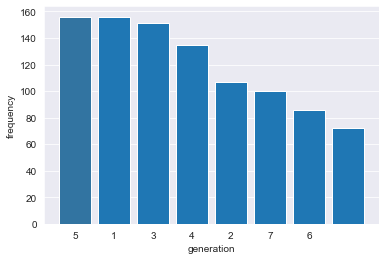

In [71]:
#plot generation id 
ordered_index=pokemon.generation_id.value_counts().index
base_color=sns.color_palette()[0]
sns.countplot(data=pokemon,x='generation_id',color=base_color,order=ordered_index);
####or
y=pokemon.generation_id.value_counts()
plt.bar(x=pokemon.generation_id.unique() , height=pokemon.generation_id.value_counts() );
plt.xlabel('generation')
plt.ylabel('frequency')
plt.show()


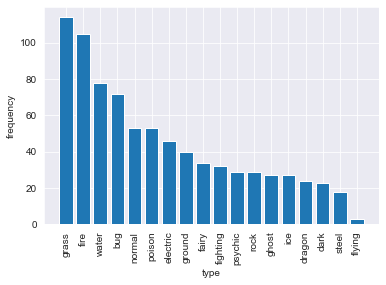

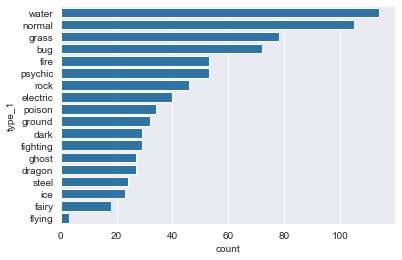

In [72]:
#plot type_1
x=pokemon.type_1.unique()
y=pokemon.type_1.value_counts()
plt.bar(x=x , height=y );
plt.xticks(rotation=90)
plt.xlabel('type')
plt.ylabel('frequency')
plt.show()
####or
ordered_index=pokemon.type_1.value_counts().index
base_color=sns.color_palette()[0]
sns.countplot(data=pokemon,y='type_1',color=base_color,order=ordered_index);


0.10808580858085809


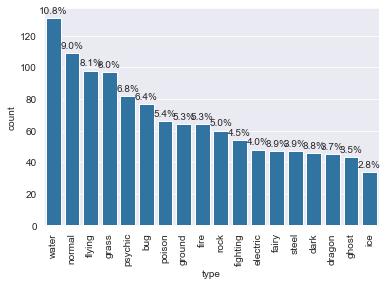

In [73]:
#create one column for type having the values of type_1 and type_2
pk=pokemon.melt(id_vars=['id','species'],value_vars=['type_1','type_2'],var_name=['type_level'],value_name='type')
type_counts = pk['type'].value_counts()
type_order = type_counts.index
base_color = sns.color_palette()[0]
# sns.countplot(data=pk, y='type', color=base_color, order=type_order);
###################################################################################################
# Returns the sum of all not-null values in `type` column
n_pokemon = pk['type'].value_counts().sum()
# Return the highest frequency in the `type` column
max_type_count = type_counts[0]
# Return the maximum proportion
max_prop = max_type_count / n_pokemon
print(max_prop)
####### to plot propotions we can ust the same plot but change the x ticks only
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
tick_props = np.arange(0, max_prop, 0.02)
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names
# sns.countplot(data=pk, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');
#####################################################
#Rather than plotting the data on a relative frequency scale, you might use text annotations
base_color = sns.color_palette()[0]
# sns.countplot(data=pk, y='type', color=base_color, order=type_order);
# for i in range(len(type_counts)):
#     text='{:0.1f}'.format(100*(type_counts[i]/n_pokemon))
#     plt.text(type_counts[i],i,text,ha = 'center')
#####################################################
sns.countplot(data=pk, x='type', color=base_color, order=type_order);
plt.xticks(rotation=90) 
for i in range(len(type_counts)):
    text='{:0.1f}%'.format(100*(type_counts[i]/n_pokemon))
    plt.text(i,type_counts[i]+3,text,ha = 'center')
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 20,8


## 2-Pie charts  (Used for categorical)

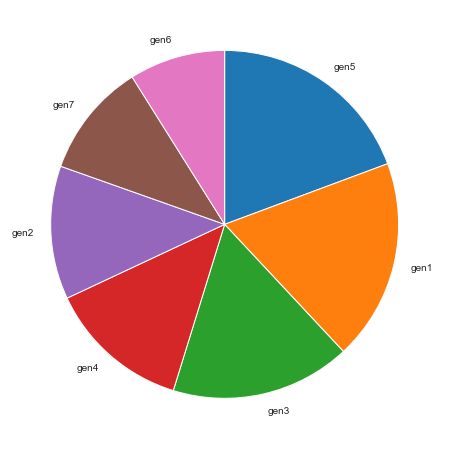

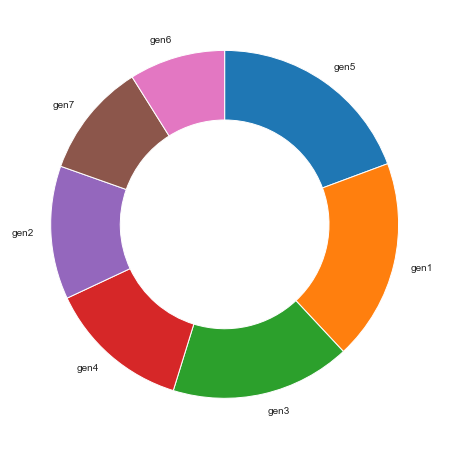

In [74]:
sorted_count=pokemon.generation_id.value_counts()
labels=['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6']
plt.pie(sorted_count,labels=labels,startangle=90,counterclock=False);
plt.show()
plt.axis('square');#Square plot; similar to 'scaled', but initially forcing xmax-xmin == ymax-ymin.
#donut 
plt.pie(sorted_count,labels=labels,startangle=90,counterclock=False,wedgeprops={'width' : 0.4});
plt.show()

## 3-waffle Plot (Used for categorical)

In [155]:
!pip install pywaffle


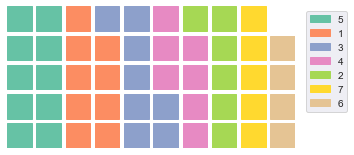

In [169]:
from pywaffle import Waffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=dict(pokemon.generation_id.value_counts()),
    figsize=(5, 3),
    legend={'loc':'upper right','bbox_to_anchor':(1.2,1)},
#     icons='dragon', 
    icon_legend=True

)
plt.show()


## 4-Histograms (Used for quantitative )

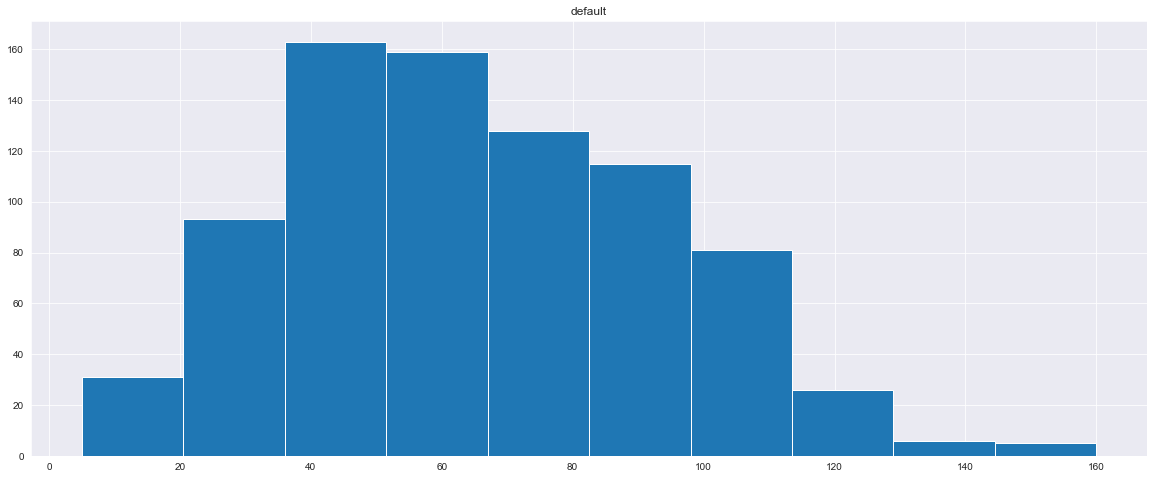

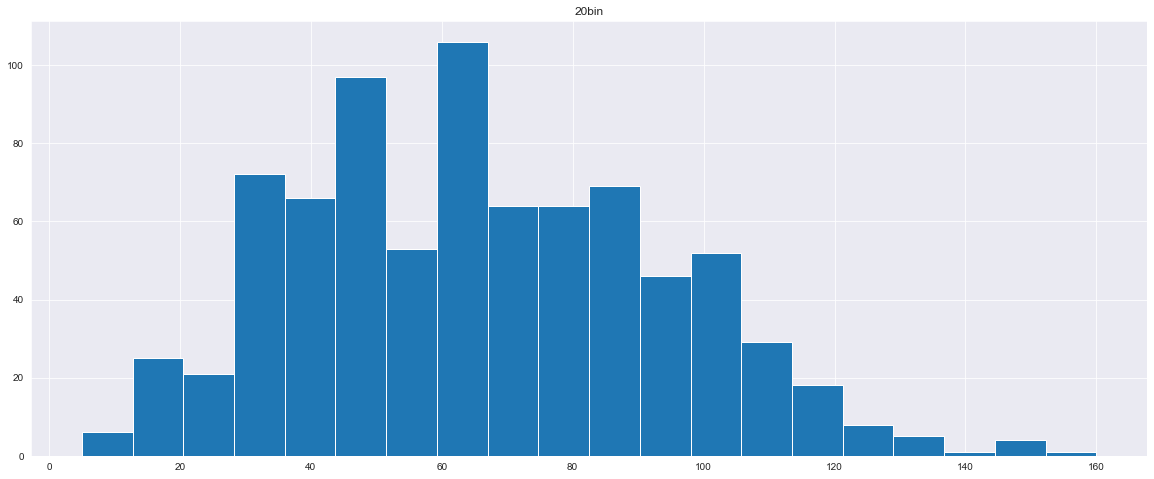

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64


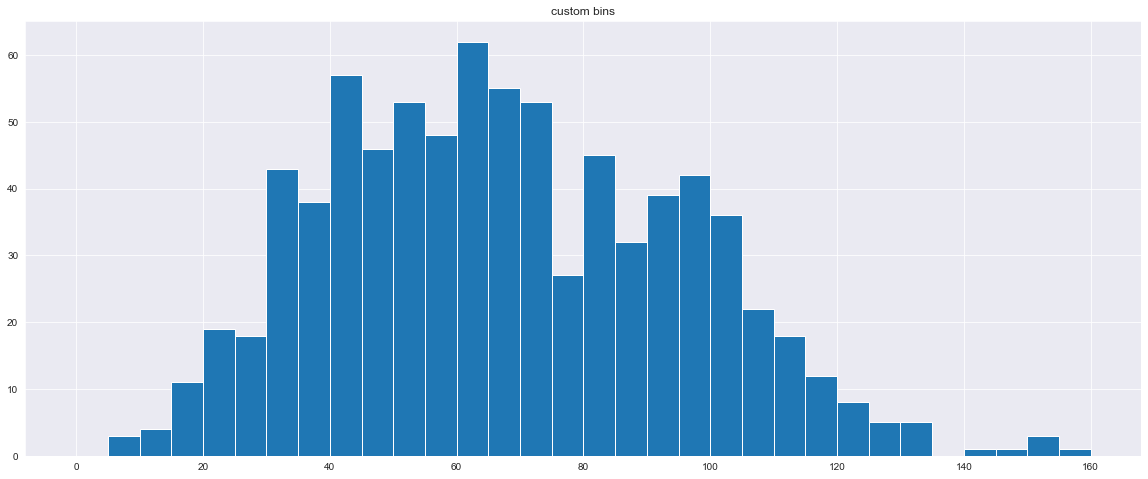

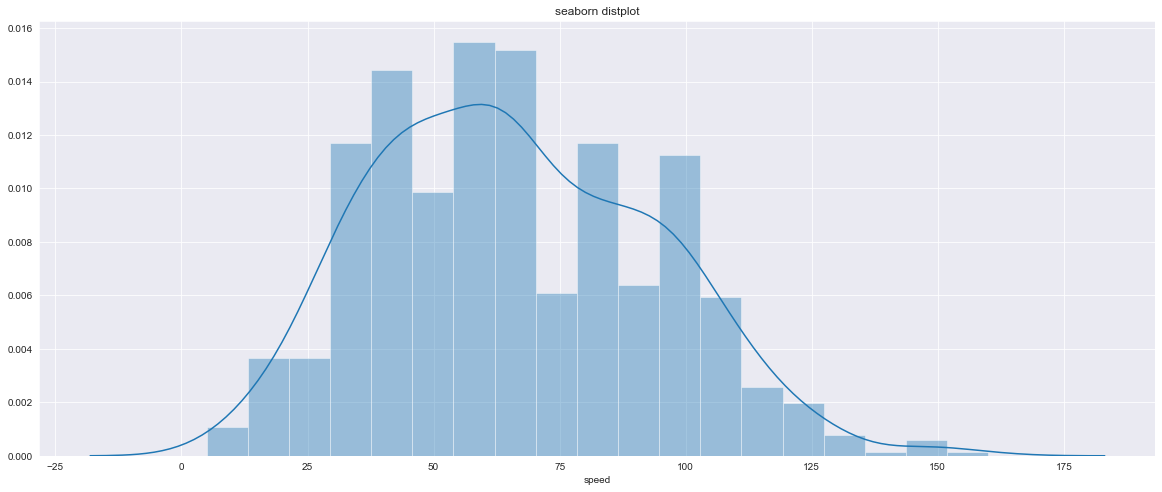

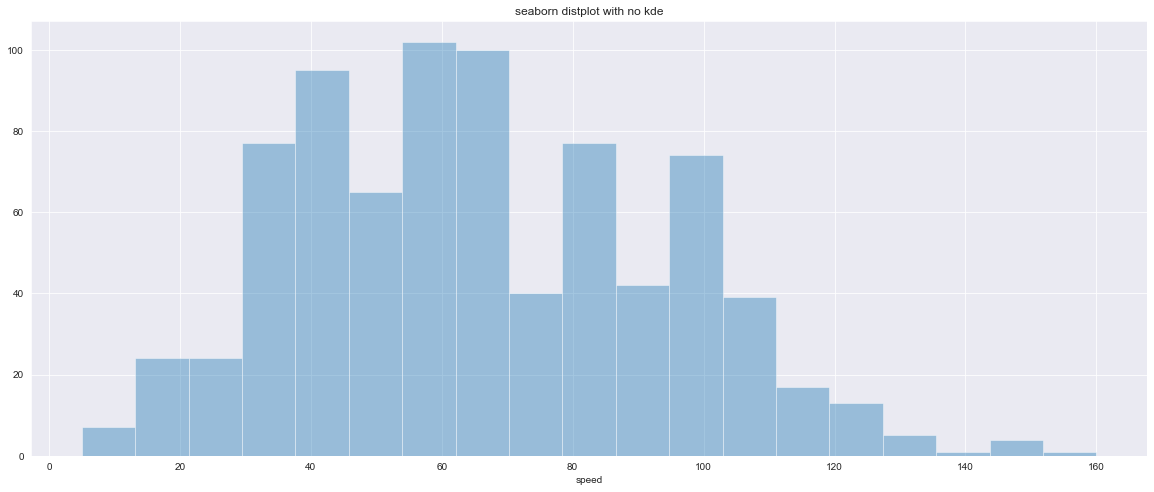

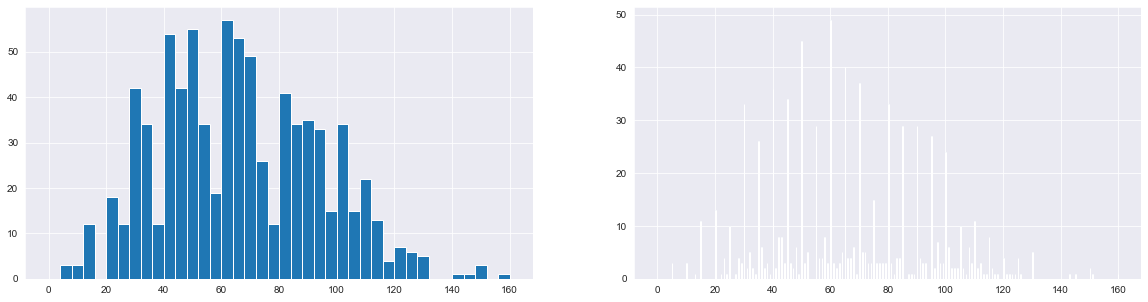

In [139]:
sns.set_style('darkgrid')
plt.hist(pokemon.speed);#default is 10 bins
plt.title('default')
plt.show()
plt.hist(pokemon.speed,bins=20);#20 bins
plt.title('20bin')
plt.show()
## customized bins
print(pokemon.speed.describe())
bins=np.arange(0,pokemon['speed'].max()+5,5)
plt.hist(pokemon.speed,bins=bins);#custom bins
plt.title('custom bins')
plt.show()
## Alternative Approach - 
#Seaborn's distplot() function has built-in rules for specifying histogram bins,
#and by default plots a curve depicting the kernel density estimate (KDE) on top of the data.
#The vertical axis is based on the KDE, rather than the histogram:
#you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1.
sns.distplot(pokemon.speed);
plt.title('seaborn distplot')
plt.show()
## Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sns.distplot(pokemon['speed'], kde=False)
plt.title('seaborn distplot with no kde')
plt.show()
##Plot two histograms side-by-side
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 
# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) #specify the number of rows, columns, and index of the active subplot (in that order)
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);
# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

### Choosing a Plot for Discrete Data:    
* The histogram is the most immediate choice since the data is numeric, but there's one particular consideration to make regarding the bin edges. Since data points fall on set values (bar-width), it can help to reduce ambiguity by putting bin edges between the actual values taken by the data.

* An example describing the ambiguity
  * For example, assume a given bar falls in a range [10-20], and there is an observation with value 20. This observation will lie on the next bar because the given range [10-20] does not include the upper limit 20. Therefore, your readers may not know that values on bin edges end up in the bin to their right, so this can bring potential confusion when they interpret the plot.

**Compare the two visualizations of 100 random die rolls below (in die_rolls), with bin edges falling on the observation values in the left subplot, and bin edges in between the observation values in the right subplot.**


,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8


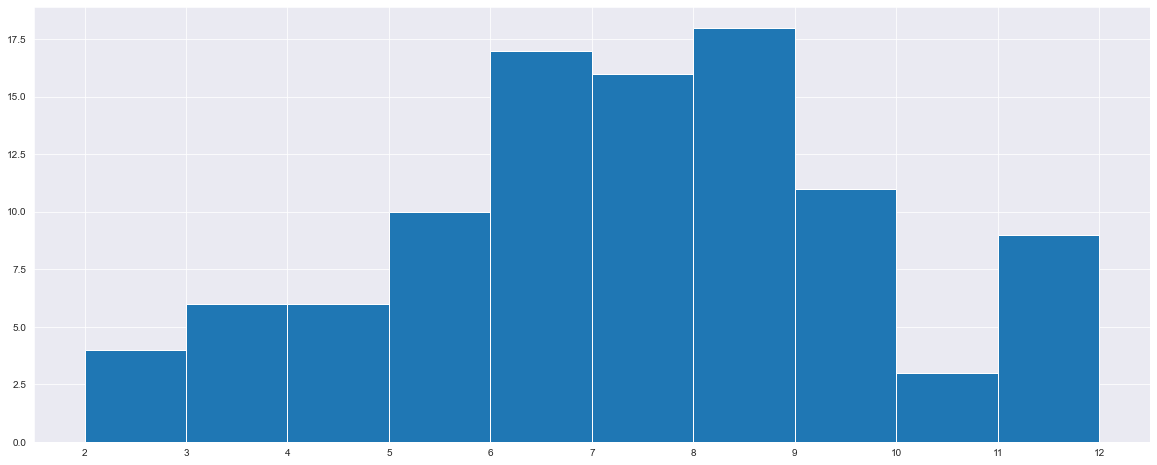

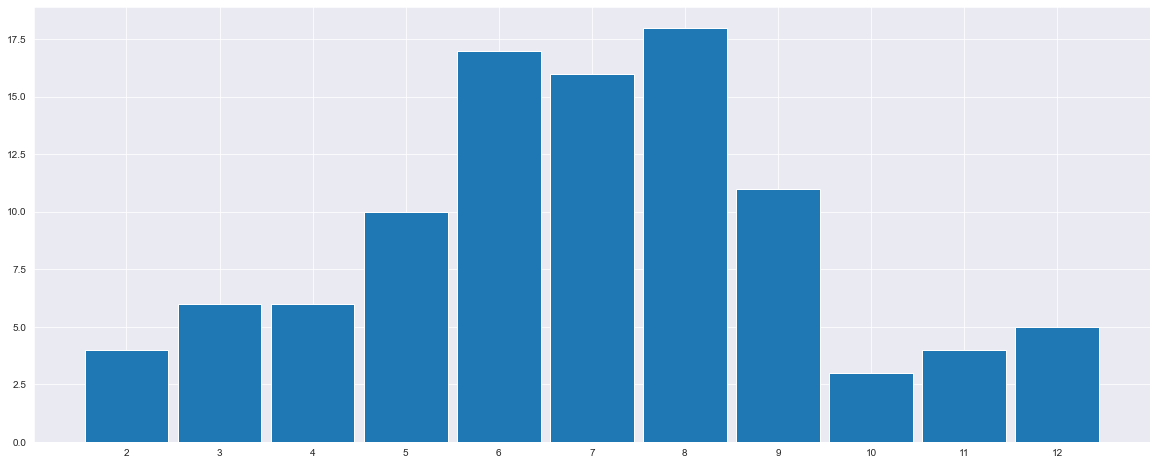

In [94]:
die_rolls = pd.read_csv('die-rolls.csv')
display(die_rolls.head(3))
plt.hist(die_rolls.Sum);
plt.xticks(np.arange(2,13,1));
plt.show()
## with custom bins for a better comprehension
bins=np.arange(1.5,13,1)
plt.hist(die_rolls.Sum,bins=bins,rwidth = 0.9);
plt.xticks(np.arange(2,13,1));

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception

**Descriptive Statistics, Outliers, and Axis Limits**   
* As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like the number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. Let's see a few examples.

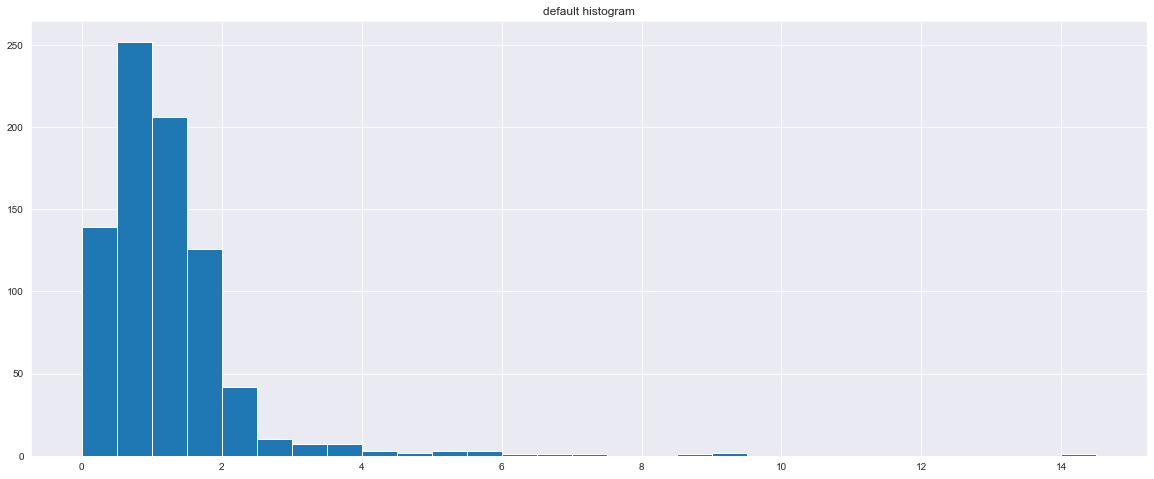

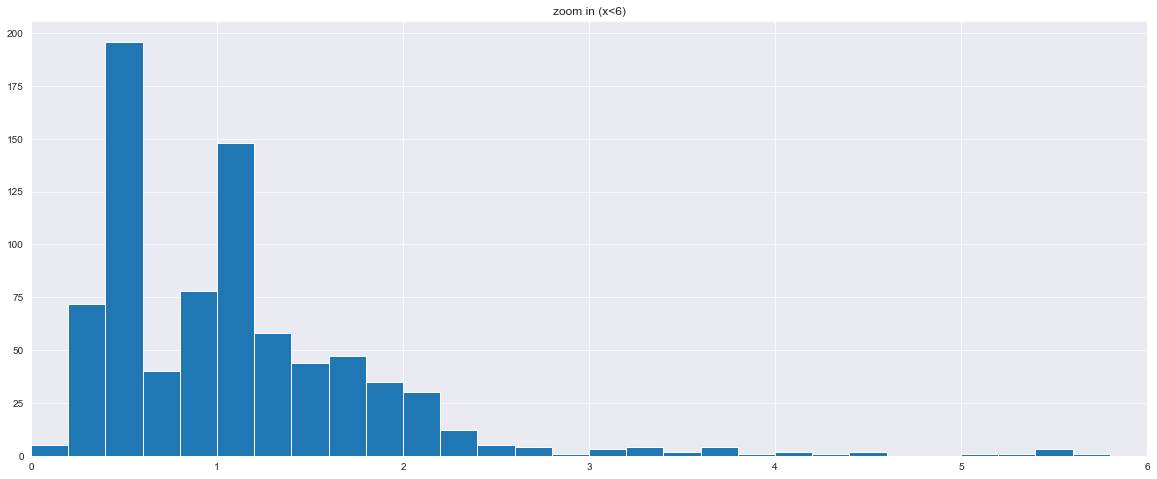

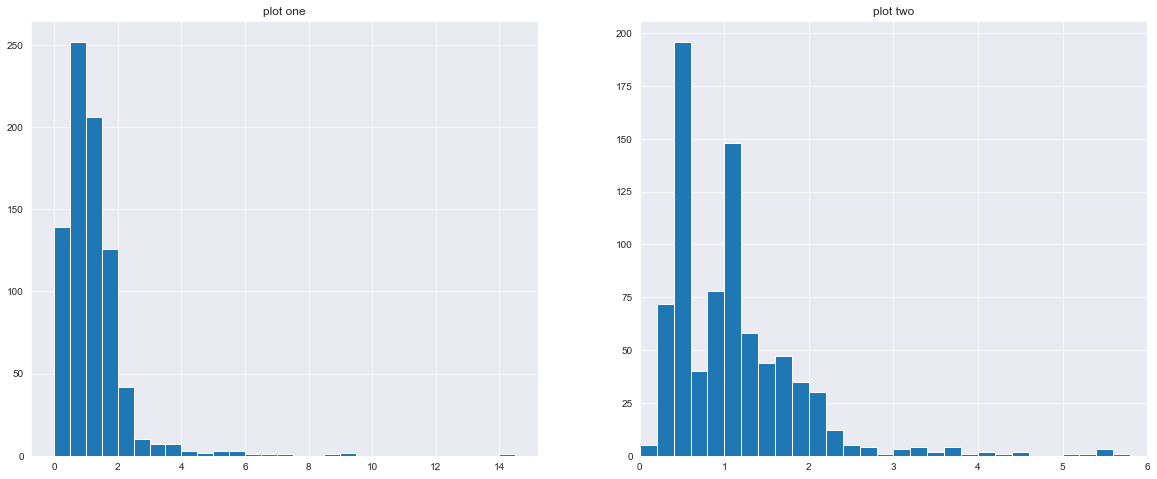

In [114]:
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(pokemon.height,bins=bins);
plt.title('default histogram')
plt.show()

#################################################################################################
# the use of axis limits can allow focusing on data points in that range without needing ,to go #
# through the creation of new DataFrame filtering out the data points in the latter group(> 6). #
#################################################################################################

bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(pokemon.height,bins=bins);
plt.xlim(0,6)
plt.title('zoom in (x<6)')
plt.show()

#Plot the above two graphs in a single figure

plt.subplot(1,2,1)
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(pokemon.height,bins=bins);
plt.title('plot one');

plt.subplot(1,2,2)
bin_edges = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins = bin_edges);
plt.xlim(0, 6) # could also be called as plt.xlim((0, 6))
plt.title('plot two');


**Scales and Transformations**   
Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. (If you need a refresher on the logarithm function, check out this lesson on Khan Academy.)

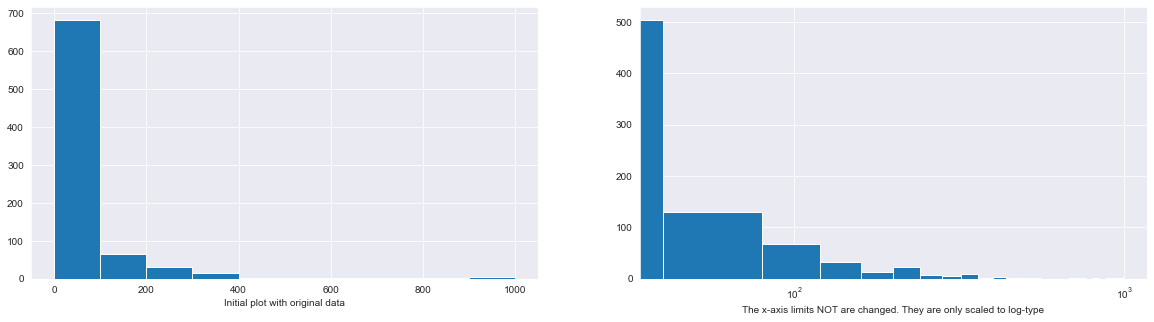

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64


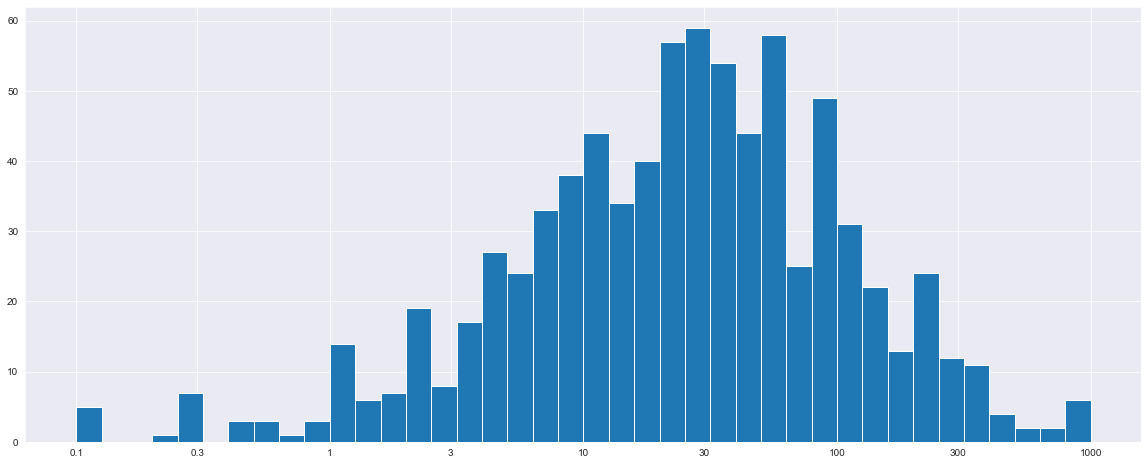

In [137]:
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type');
plt.show()
##Scale the x-axis to log-type, and change the axis limit.
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
print(np.log10(pokemon['weight'].describe()))
##knowing the lower and upper limit of log values we can now change the axis limits
bins= 10 ** np.arange(-1,3+0.1,0.1)
plt.hist(data=pokemon, x='weight', bins=bins);
ticks=[0.1,.3,1,3,10,30,100,300,1000]# 3 is halfway between two consecutive values on log scale
labels=[str(x) for x in ticks]
plt.xscale('log');
plt.xticks(ticks,labels)
plt.show()
#It is important that the xticks are specified after xscale since that function has its own built-in tick settings.

**Alternative Approach**   
Be aware that a logarithmic transformation is not the only one possible. When we perform a logarithmic transformation, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transformation that you choose may be informed by the context for the data. For example, this Wikipedia section provides a few examples of places where log-normal distributions have been observed.

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

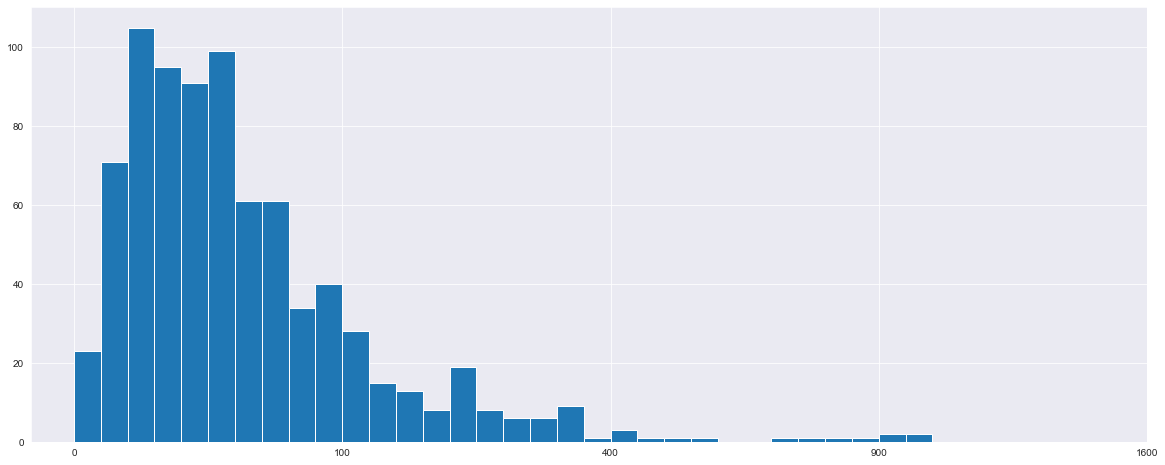

In [138]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));